In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

### <font color="blue">Load Dataset</font>

In [2]:
#Loading the dataset
mc_df = pd.read_csv("Marketing_Campaign.csv", sep="\t")
print("Number of datapoints:", len(mc_df))
mc_df.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome   
0  5524        1957  Graduation         Single  58138.0        0         0  \
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3   
0  04-09-2012       58       635  ...                  7             0  \
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   
0             0             0             0             0         0  \
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
mc_df = mc_df.dropna()
mc_df

ID  Year_Birth   Education Marital_Status   Income  Kidhome   
0      5524        1957  Graduation         Single  58138.0        0  \
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth   
0            0  04-09-2012       58       635  ...                  7  \
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0                0             0             0             0             0  \
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2216 rows x 29 columns]

### <font color="blue">EDA</font>

In [5]:
mc_df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [6]:
mc_df["Dt_Customer"] = pd.to_datetime(mc_df["Dt_Customer"], format = '%d-%m-%Y')
dates = []
for i in mc_df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
mc_df["Customer_For"] = days
mc_df["Customer_For"] = pd.to_numeric(mc_df["Customer_For"], errors="coerce")

mc_df

ID  Year_Birth   Education Marital_Status   Income  Kidhome   
0      5524        1957  Graduation         Single  58138.0        0  \
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3   
0            0  2012-09-04       58       635  ...             0  \
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain   
0                0             0             0             0         0  \
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response       Customer_For  
0                 3         11         1  57283200000000000  
1                 3         11         0   9763200000000000  
2                 3         11         0  26956800000000000  
3                 3         11         0  12009600000000000  
4                 3         11         0  13910400000000000  
...             ...        ...       ...                ...  
2235              3         11         0  32918400000000000  
2236              3         11         0   1641600000000000  
2237              3         11         0  13392000000000000  
2238              3         11         0  13478400000000000  
2239              3         11         1  53740800000000000  

[2216 rows x 30 columns]

In [9]:
#Feature Engineering
#Age of customer today 
mc_df["Age"] = 2014-mc_df["Year_Birth"]

#Total spendings on various items
mc_df["Spent"] = mc_df["MntWines"]+ mc_df["MntFruits"]+ mc_df["MntMeatProducts"]+ mc_df["MntFishProducts"]+ mc_df["MntSweetProducts"]+ mc_df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
mc_df["Living_With"]=mc_df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
mc_df["Children"]=mc_df["Kidhome"]+mc_df["Teenhome"]

#Feature for total members in the householde
mc_df["Family_Size"] = mc_df["Living_With"].replace({"Alone": 1, "Partner":2})+ mc_df["Children"]

#Feature pertaining parenthood
mc_df["Is_Parent"] = np.where(mc_df.Children > 0, 1, 0)

#Segmenting education levels in three groups
mc_df["Education"]=mc_df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
mc_df=mc_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
mc_df = mc_df.drop(to_drop, axis=1)

mc_df

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat   
0         Graduate  58138.0        0         0       58    635      88   546  \
1         Graduate  46344.0        1         1       38     11       1     6   
2         Graduate  71613.0        0         0       26    426      49   127   
3         Graduate  26646.0        1         0       26     11       4    20   
4     Postgraduate  58293.0        1         0       94    173      43   118   
...            ...      ...      ...       ...      ...    ...     ...   ...   
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For   
0      172      88  ...             0         0         1  57283200000000000  \
1        2       1  ...             0         0         0   9763200000000000   
2      111      21  ...             0         0         0  26956800000000000   
3       10       3  ...             0         0         0  12009600000000000   
4       46      27  ...             0         0         0  13910400000000000   
...    ...     ...  ...           ...       ...       ...                ...   
2235    42     118  ...             0         0         0  32918400000000000   
2236     0       0  ...             0         0         0   1641600000000000   
2237    32      12  ...             0         0         0  13392000000000000   
2238    80      30  ...             0         0         0  13478400000000000   
2239     2       1  ...             0         0         1  53740800000000000   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0      57   1617        Alone         0            1          0  
1      60     27        Alone         2            3          1  
2      49    776      Partner         0            2          0  
3      30     53      Partner         1            3          1  
4      33    422      Partner         1            3          1  
...   ...    ...          ...       ...          ...        ...  
2235   47   1341      Partner         1            3          1  
2236   68    444      Partner         3            5          1  
2237   33   1241        Alone         0            1          0  
2238   58    843      Partner         1            3          1  
2239   60    172      Partner         2            4          1  

[2216 rows x 30 columns]

In [10]:
mc_df.describe()

Income      Kidhome     Teenhome      Recency        Wines   
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  \
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...   
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...  \
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For   
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03  \
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     45.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      18.000000     5.000000     0.000000     1.000000     0.000000  
25%      37.000000    69.000000     0.000000     2.000000     0.000000  
50%      44.000000   396.500000     1.000000     3.000000     1.000000  
75%      55.000000  1048.000000     1.000000     3.000000     1.000000  
max     121.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

<Figure size 800x550 with 0 Axes>

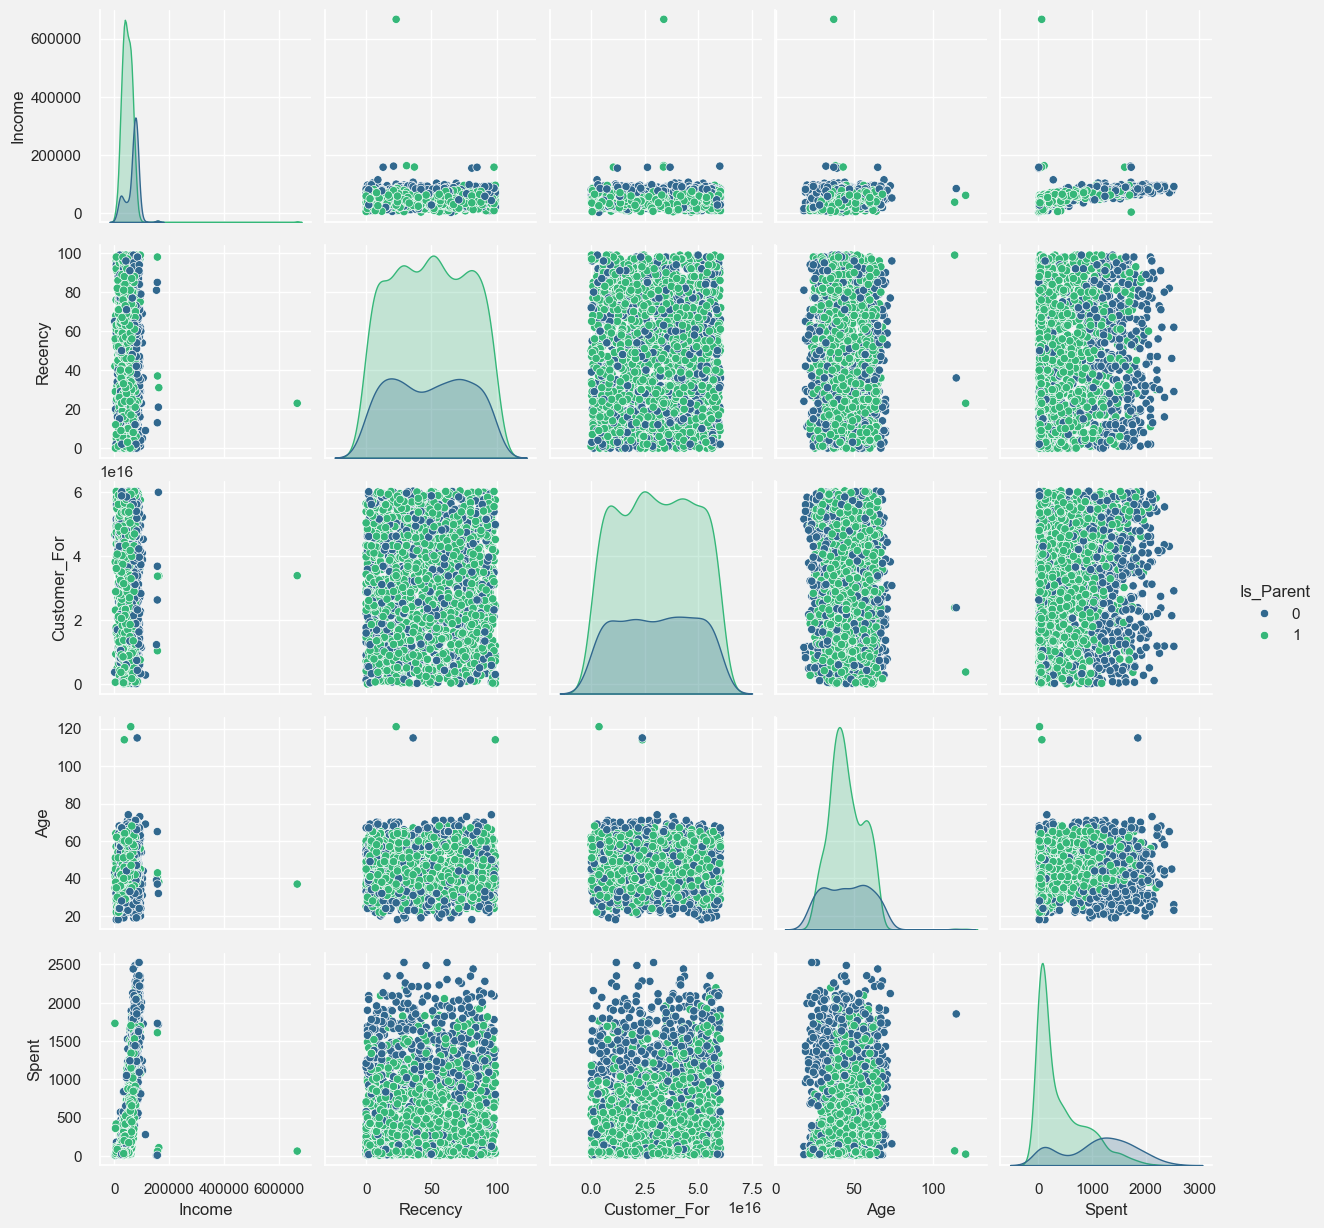

In [12]:
sns.set(rc={"axes.facecolor":"#F2F2F2","figure.facecolor":"#F2F2F2"})
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

plt.figure()
sns.pairplot(mc_df[To_Plot], hue= "Is_Parent",palette='viridis')
plt.show()

In [13]:
#Dropping the outliers by setting a cap on Age and income. 
mc_df = mc_df[(mc_df["Age"]<90)]
mc_df = mc_df[(mc_df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(mc_df))

The total number of data-points after removing the outliers are: 2212


<Figure size 800x550 with 0 Axes>

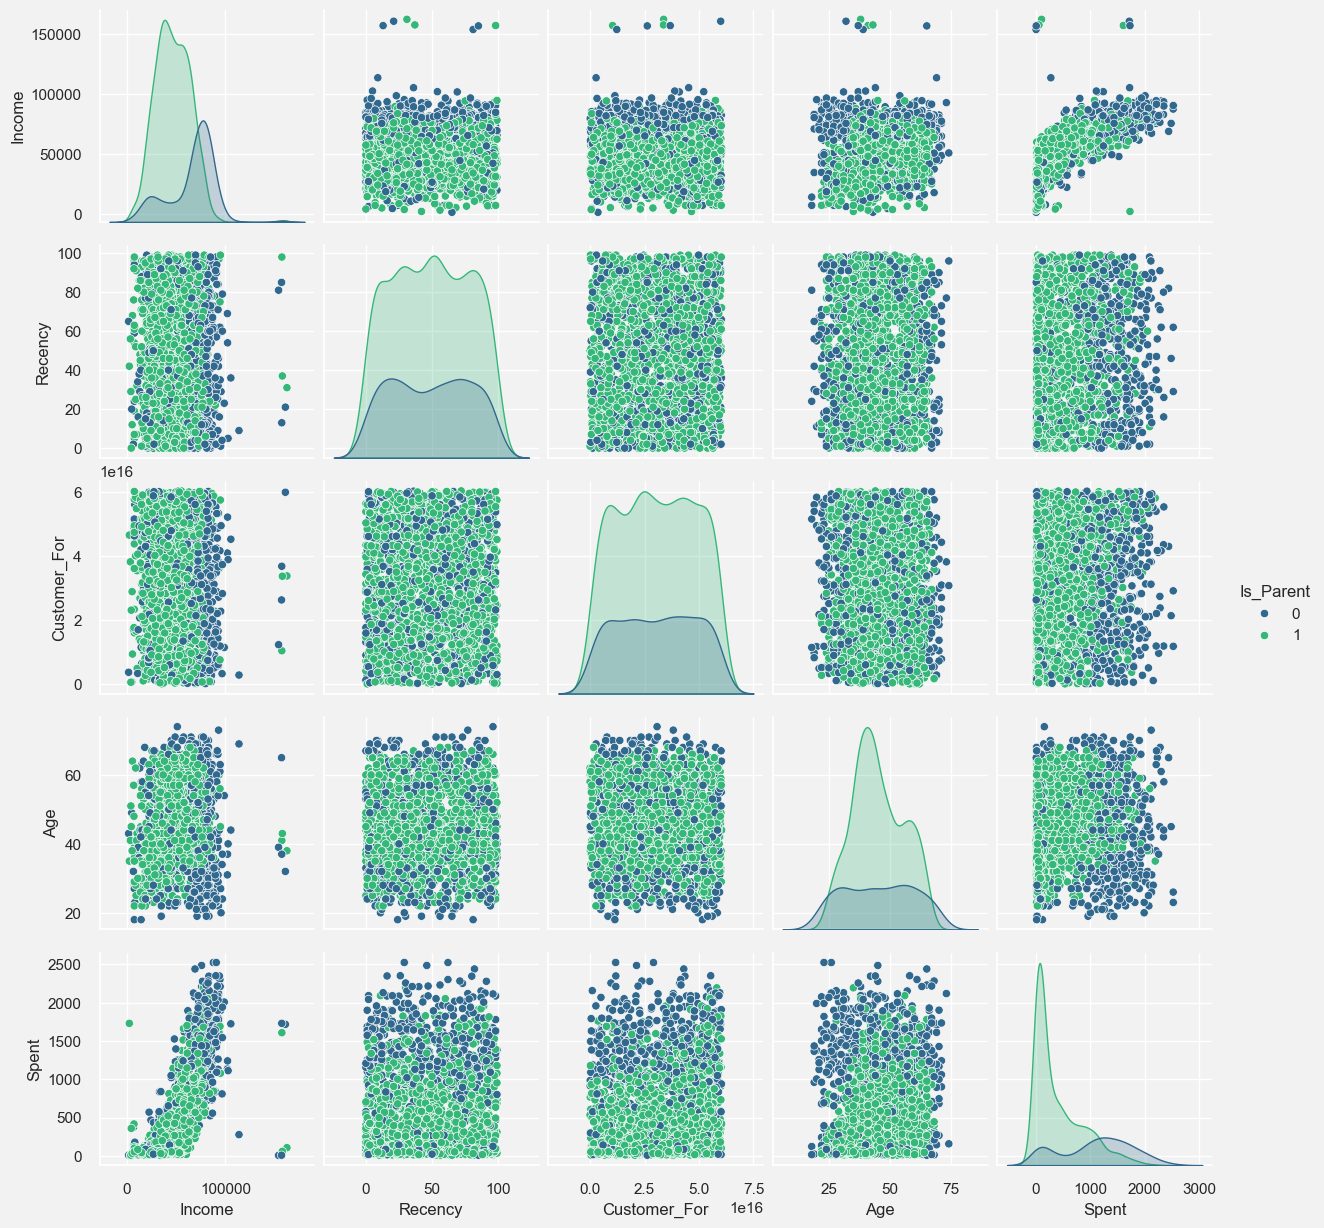

In [14]:
sns.set(rc={"axes.facecolor":"#F2F2F2","figure.facecolor":"#F2F2F2"})
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

plt.figure()
sns.pairplot(mc_df[To_Plot], hue= "Is_Parent",palette='viridis')
plt.show()

In [15]:
numeric_columns = mc_df.select_dtypes(include=['float64', 'int64'])

In [16]:
sns.set(rc={"axes.facecolor":"#FFFFFF","figure.facecolor":"#FFFFFF"})

<Axes: >

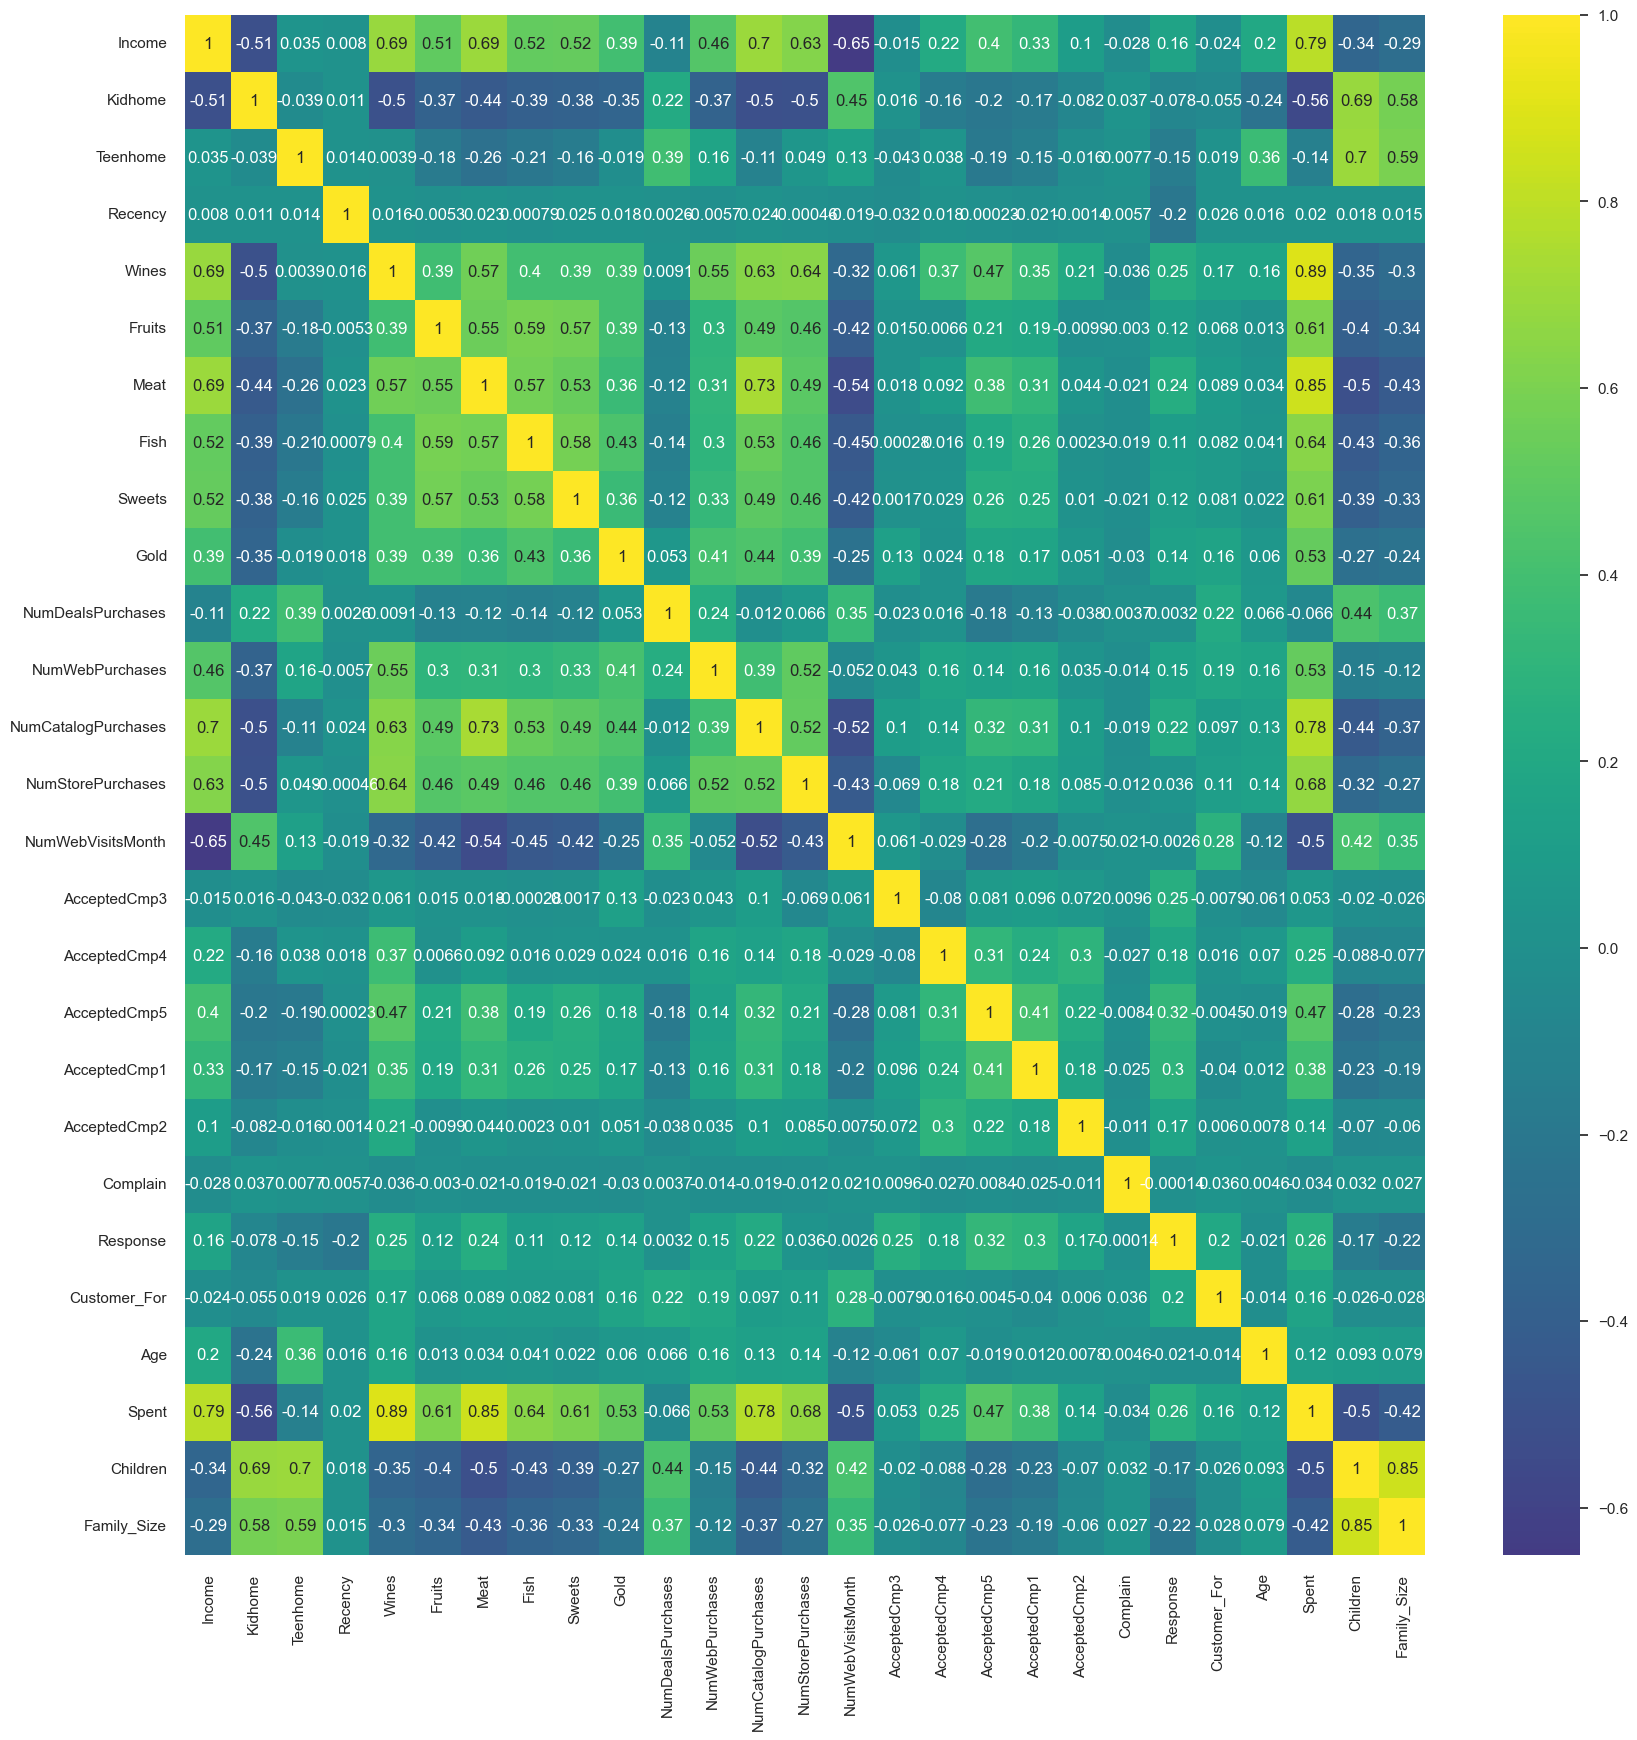

In [17]:
#correlation matrix
corrmat= numeric_columns.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap='viridis', center=0)

### Label Encoder

In [18]:
#Get list of categorical variables
s = (mc_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [19]:
LE = LabelEncoder()
for i in object_cols:
    mc_df[i]=mc_df[[i]].apply(LE.fit_transform)
    
mc_df

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat   
0             0  58138.0        0         0       58    635      88   546  \
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For   
0      172      88  ...             0         0         1  57283200000000000  \
1        2       1  ...             0         0         0   9763200000000000   
2      111      21  ...             0         0         0  26956800000000000   
3       10       3  ...             0         0         0  12009600000000000   
4       46      27  ...             0         0         0  13910400000000000   
...    ...     ...  ...           ...       ...       ...                ...   
2235    42     118  ...             0         0         0  32918400000000000   
2236     0       0  ...             0         0         0   1641600000000000   
2237    32      12  ...             0         0         0  13392000000000000   
2238    80      30  ...             0         0         0  13478400000000000   
2239     2       1  ...             0         0         1  53740800000000000   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0      57   1617            0         0            1          0  
1      60     27            0         2            3          1  
2      49    776            1         0            2          0  
3      30     53            1         1            3          1  
4      33    422            1         1            3          1  
...   ...    ...          ...       ...          ...        ...  
2235   47   1341            1         1            3          1  
2236   68    444            1         3            5          1  
2237   33   1241            0         0            1          0  
2238   58    843            1         1            3          1  
2239   60    172            1         2            4          1  

[2212 rows x 30 columns]

### Scaling

In [20]:
#Creating a copy of data
mc_df_s = mc_df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
mc_df_s = mc_df_s.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(mc_df_s)
mc_df_scaled = pd.DataFrame(scaler.transform(mc_df_s),columns= mc_df_s.columns )

In [21]:
mc_df_scaled

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits   
0     -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041  \
1     -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2     -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3     -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4      0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
...         ...       ...       ...       ...       ...       ...       ...   
2207  -0.893586  0.430444 -0.822754  0.908097 -0.104347  1.197084  0.419540   
2208   0.571657  0.560123  2.902796  0.908097  0.241237  0.298631 -0.662628   
2209  -0.893586  0.233347 -0.822754 -0.929699  1.450778  1.787156  0.545373   
2210   0.571657  0.803172 -0.822754  0.908097 -1.417564  0.363866  0.092373   
2211   0.571657  0.042290  1.040021  0.908097 -0.311697 -0.656159 -0.587128   

          Meat      Fish    Sweets  ...  NumCatalogPurchases   
0     1.690293  2.453472  1.483713  ...             2.503607  \
1    -0.718230 -0.651004 -0.634019  ...            -0.571340   
2    -0.178542  1.339513 -0.147184  ...            -0.229679   
3    -0.655787 -0.504911 -0.585335  ...            -0.913000   
4    -0.218684  0.152508 -0.001133  ...             0.111982   
...        ...       ...       ...  ...                  ...   
2207  0.066770  0.079461  2.213965  ...             0.111982   
2208 -0.611184 -0.687527 -0.658360  ...            -0.229679   
2209  0.222878 -0.103155 -0.366260  ...             0.111982   
2210  0.209498  0.773403  0.071892  ...             0.795303   
2211 -0.472917 -0.651004 -0.634019  ...            -0.571340   

      NumStorePurchases  NumWebVisitsMonth  Customer_For       Age     Spent   
0             -0.555814           0.692181      1.527721  1.018352  1.676245  \
1             -1.171160          -0.132545     -1.189011  1.274785 -0.963297   
2              1.290224          -0.544908     -0.206048  0.334530  0.280110   
3             -0.555814           0.279818     -1.060584 -1.289547 -0.920135   
4              0.059532          -0.132545     -0.951915 -1.033114 -0.307562   
...                 ...                ...           ...       ...       ...   
2207          -0.555814          -0.132545      0.134778  0.163575  1.218061   
2208          -0.248141           0.692181     -1.653326  1.958607 -0.271040   
2209           2.213242           0.279818     -0.981552 -1.033114  1.052052   
2210           1.290224          -0.957271     -0.976612  1.103830  0.391336   
2211          -0.555814           0.692181      1.325201  1.274785 -0.722584   

      Living_With  Children  Family_Size  Is_Parent  
0       -1.349603 -1.264598    -1.758359  -1.581139  
1       -1.349603  1.404572     0.449070   0.632456  
2        0.740959 -1.264598    -0.654644  -1.581139  
3        0.740959  0.069987     0.449070   0.632456  
4        0.740959  0.069987     0.449070   0.632456  
...           ...       ...          ...        ...  
2207     0.740959  0.069987     0.449070   0.632456  
2208     0.740959  2.739158     2.656499   0.632456  
2209    -1.349603 -1.264598    -1.758359  -1.581139  
2210     0.740959  0.069987     0.449070   0.632456  
2211     0.740959  1.404572     1.552784   0.632456  

[2212 rows x 23 columns]

<Axes: >

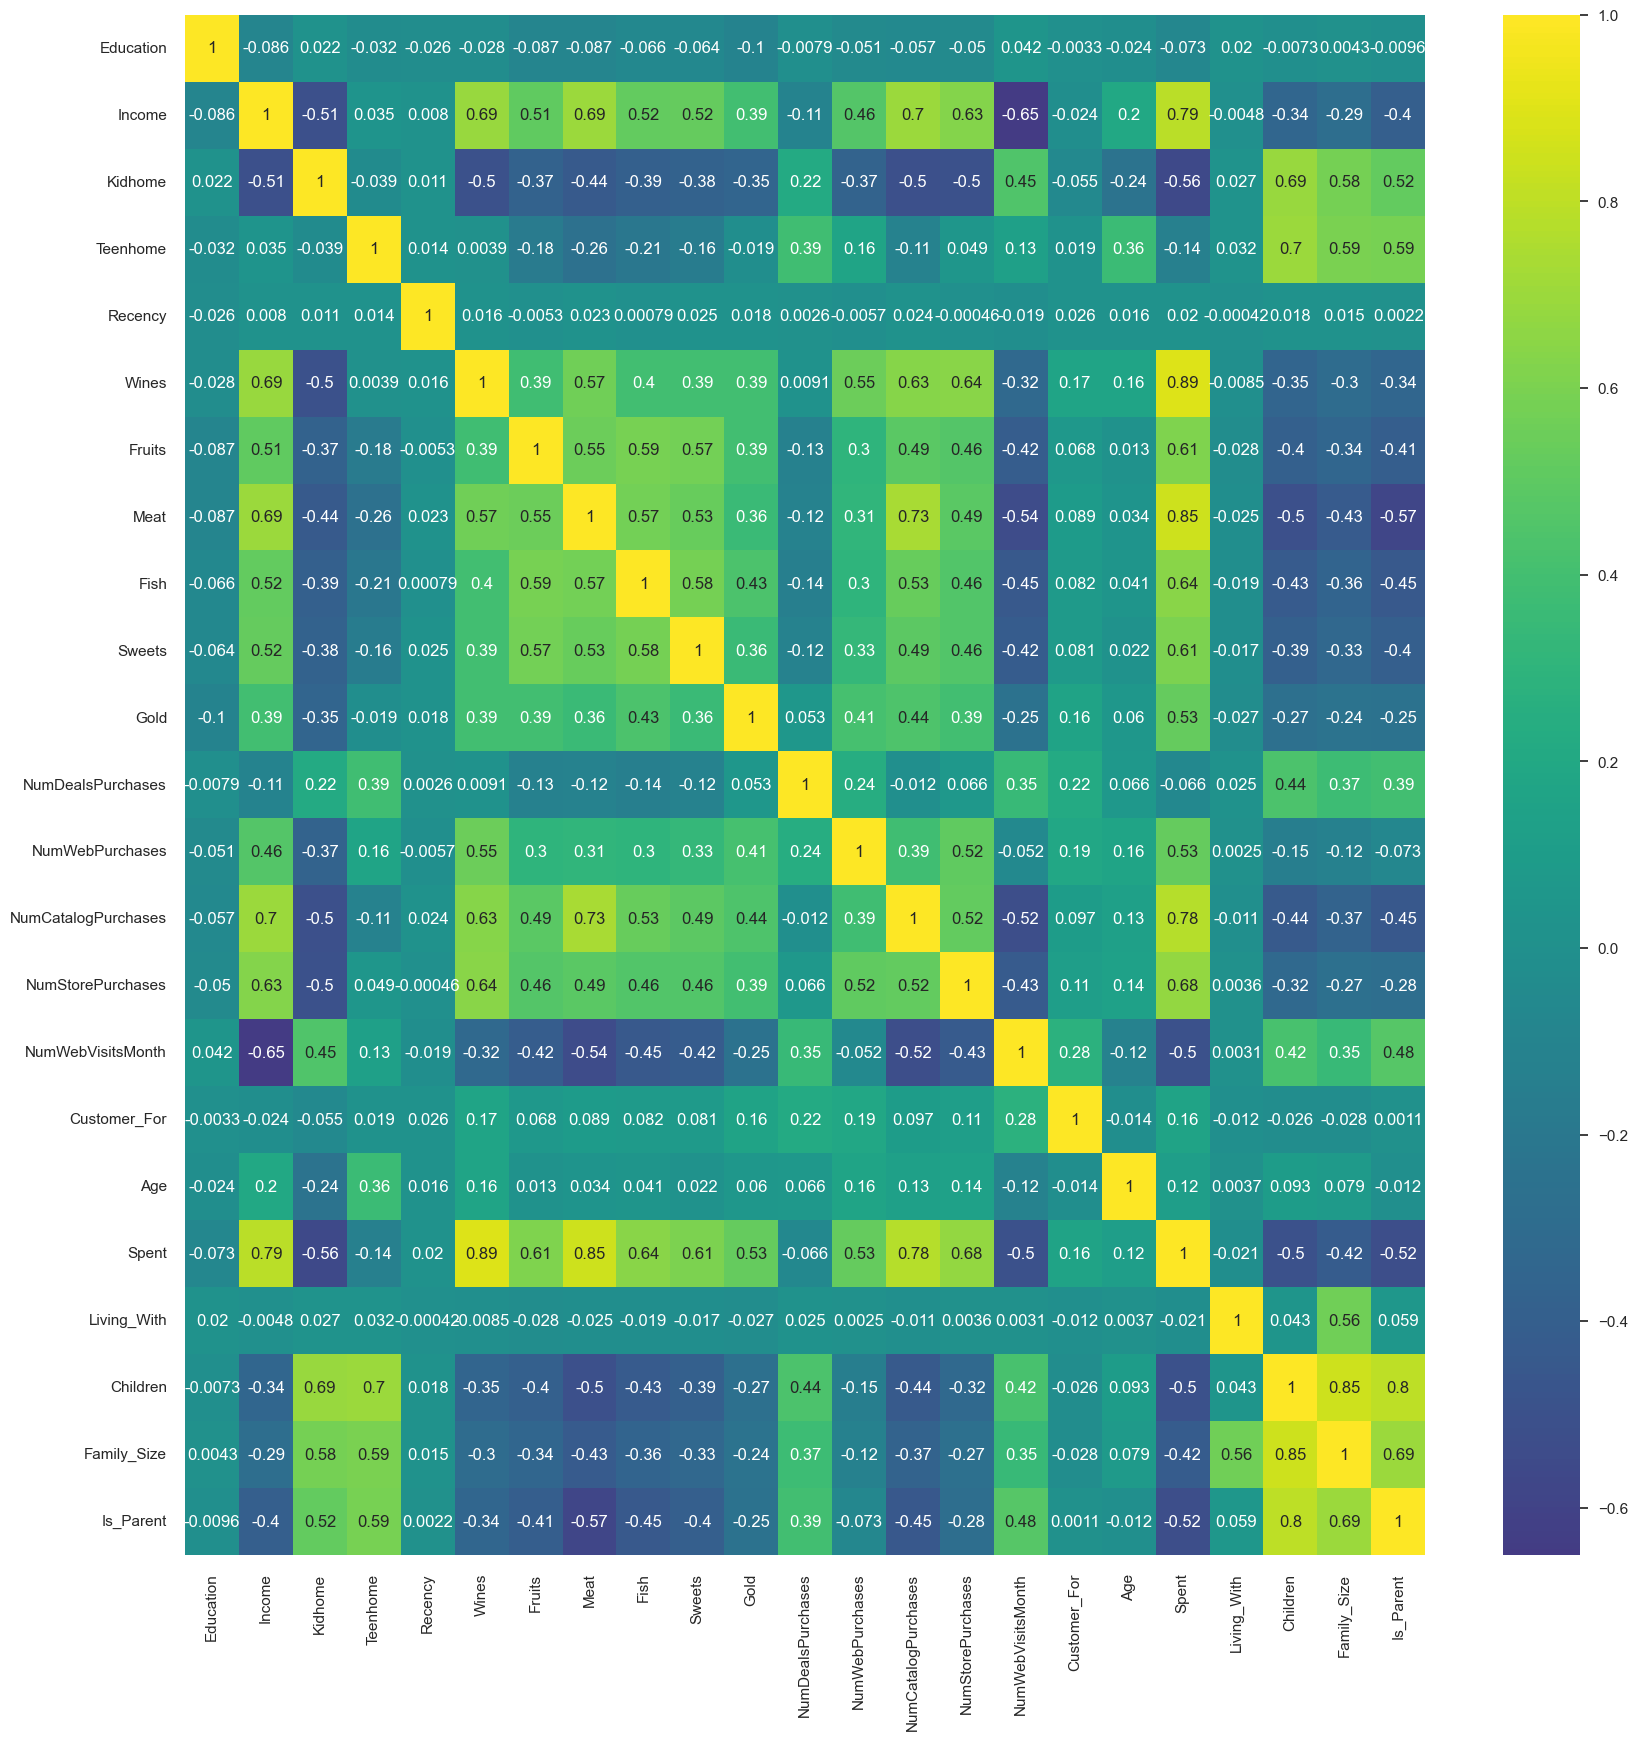

In [22]:
#correlation matrix
corrmat= mc_df_scaled.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap='viridis', center=0)

### Dimensionality Reduction

In [23]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(mc_df_scaled)
PCA_ds = pd.DataFrame(pca.transform(mc_df_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%   
col1  2212.0  6.424437e-18  2.878602 -5.978123 -2.539470 -0.781595  2.386380  \
col2  2212.0 -1.927331e-17  1.709469 -4.194757 -1.323932 -0.173716  1.234923   
col3  2212.0  8.472226e-17  1.231685 -3.625184 -0.853556 -0.051292  0.863841   

           max  
col1  7.452915  
col2  6.168185  
col3  6.746845

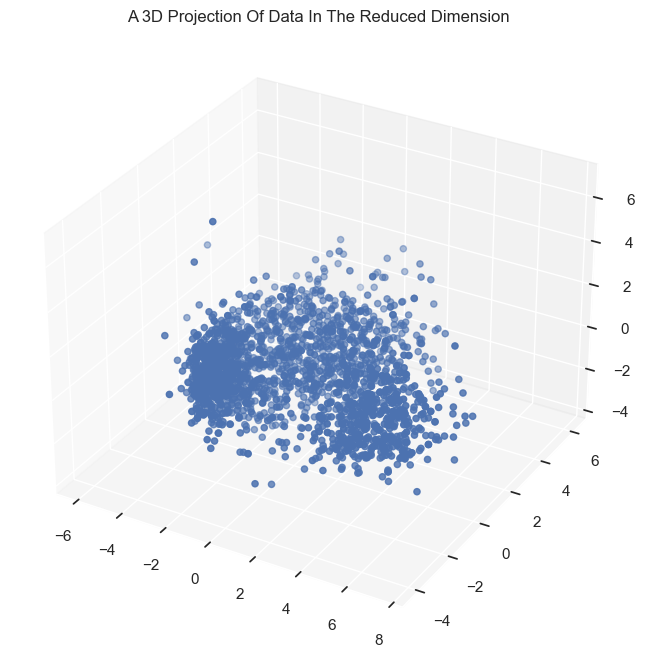

In [27]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, cmap="viridis", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [28]:
sns.set(rc={"axes.facecolor":"#F2F2F2","figure.facecolor":"#F2F2F2"})

Elbow Method to determine the number of clusters to be formed:


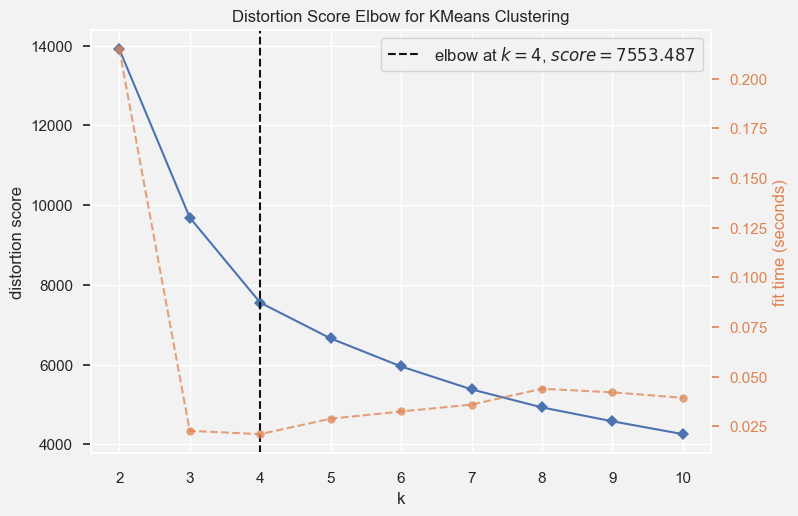

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### <font color="blue">Clustering 1: Agglomerative</font>

In [30]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds[["col1", "col2", "col3"]])
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
mc_df["Clusters"]= yhat_AC

In [31]:
sns.set(rc={"axes.facecolor":"#FFFFFF","figure.facecolor":"#FFFFFF"})

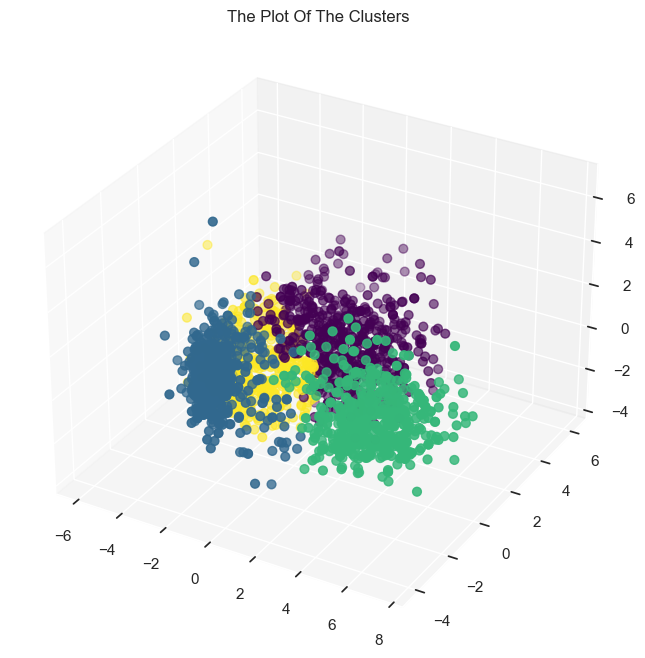

In [32]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = "viridis" )
ax.set_title("The Plot Of The Clusters")
plt.show()

### <font color="blue">Clustering 2: K-Means</font>

In [33]:
from sklearn.cluster import KMeans

In [34]:
#Initiating the Agglomerative Clustering model 
KM = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds[["col1", "col2", "col3"]])
PCA_ds["Clusters_2"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
mc_df["Clusters_2"]= yhat_KM

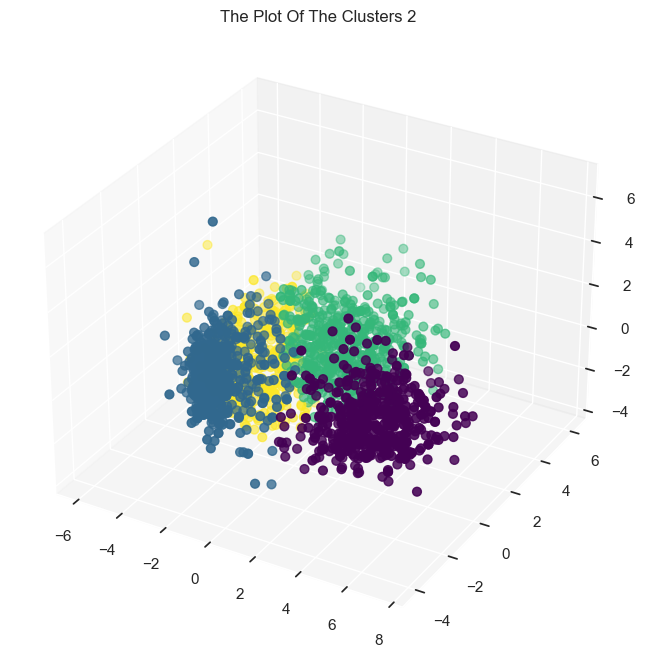

In [35]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_2"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters 2")
plt.show()

In [36]:
PCA_ds

col1      col2      col3  Clusters  Clusters_2
0     4.986336 -0.161502  2.445704         2           0
1    -2.874168  0.022701 -1.530784         3           3
2     2.615763 -0.731408 -0.264243         2           0
3    -2.654568 -1.455875 -0.398126         1           1
4    -0.656015  0.177848 -0.141472         3           3
...        ...       ...       ...       ...         ...
2207  2.322945  2.437513  0.495596         0           2
2208 -3.100999  4.014083 -1.415940         3           3
2209  2.666497 -1.893706  0.556943         2           0
2210  1.487349  1.651778 -1.760027         0           2
2211 -2.733469  1.688075 -0.212150         3           3

[2212 rows x 5 columns]

In [37]:
PCA_ds["Clusters"].value_counts()

Clusters
1    598
3    563
0    556
2    495
Name: count, dtype: int64

In [38]:
PCA_ds["Clusters_2"].value_counts()

Clusters_2
1    608
2    557
3    541
0    506
Name: count, dtype: int64

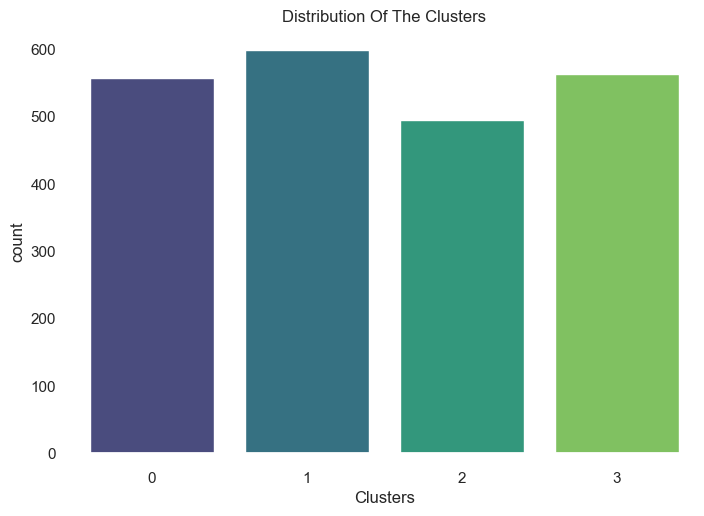

In [39]:
#Plotting countplot of clusters
#pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= 'viridis')
pl.set_title("Distribution Of The Clusters")
plt.show()

In [40]:
mc_df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters', 'Clusters_2'],
      dtype='object')

In [41]:
sns.set(rc={"axes.facecolor":"#F2F2F2","figure.facecolor":"#F2F2F2"})

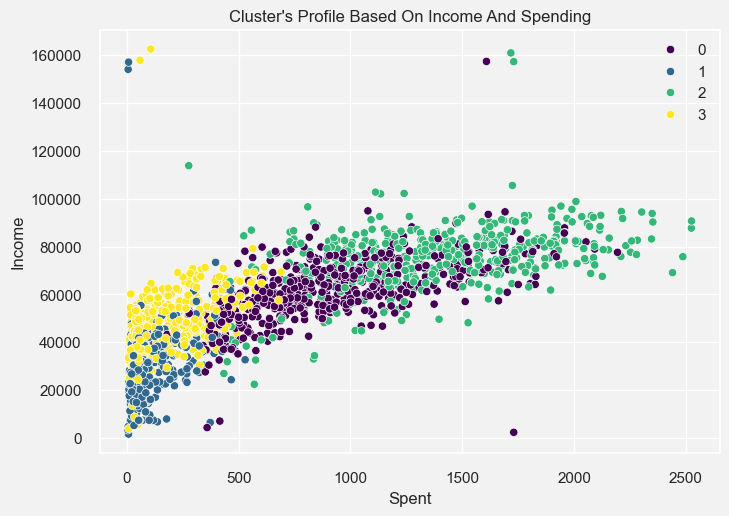

In [42]:
pl = sns.scatterplot(data = mc_df,x=mc_df["Spent"], y=mc_df["Income"],hue=mc_df["Clusters"], palette='viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

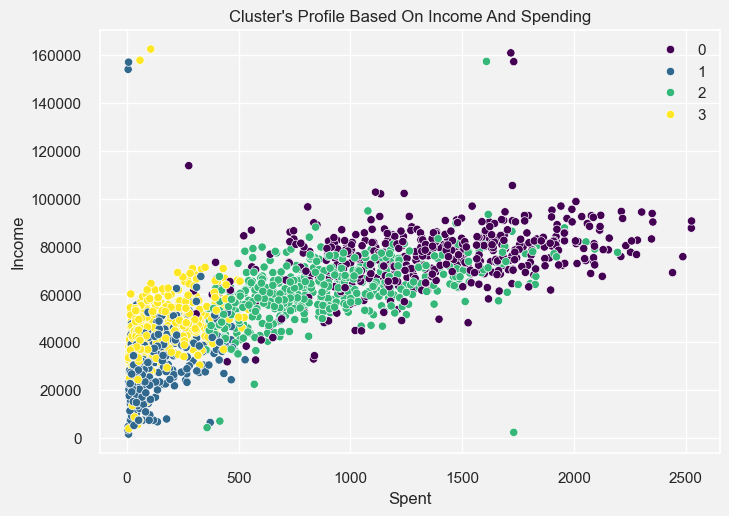

In [43]:
pl = sns.scatterplot(data = mc_df,x=mc_df["Spent"], y=mc_df["Income"],hue=mc_df["Clusters_2"], palette='viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

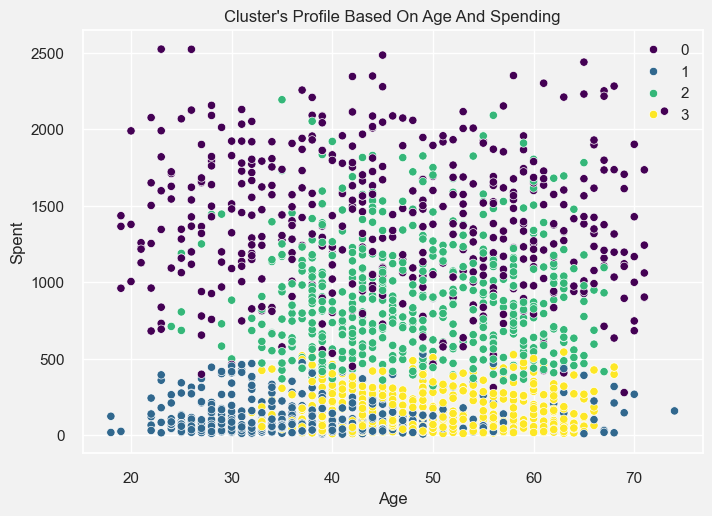

In [45]:
pl = sns.scatterplot(data = mc_df,x=mc_df["Age"], y=mc_df["Spent"],hue=mc_df["Clusters_2"], palette='viridis')
pl.set_title("Cluster's Profile Based On Age And Spending")
plt.legend()
plt.show()

In [46]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

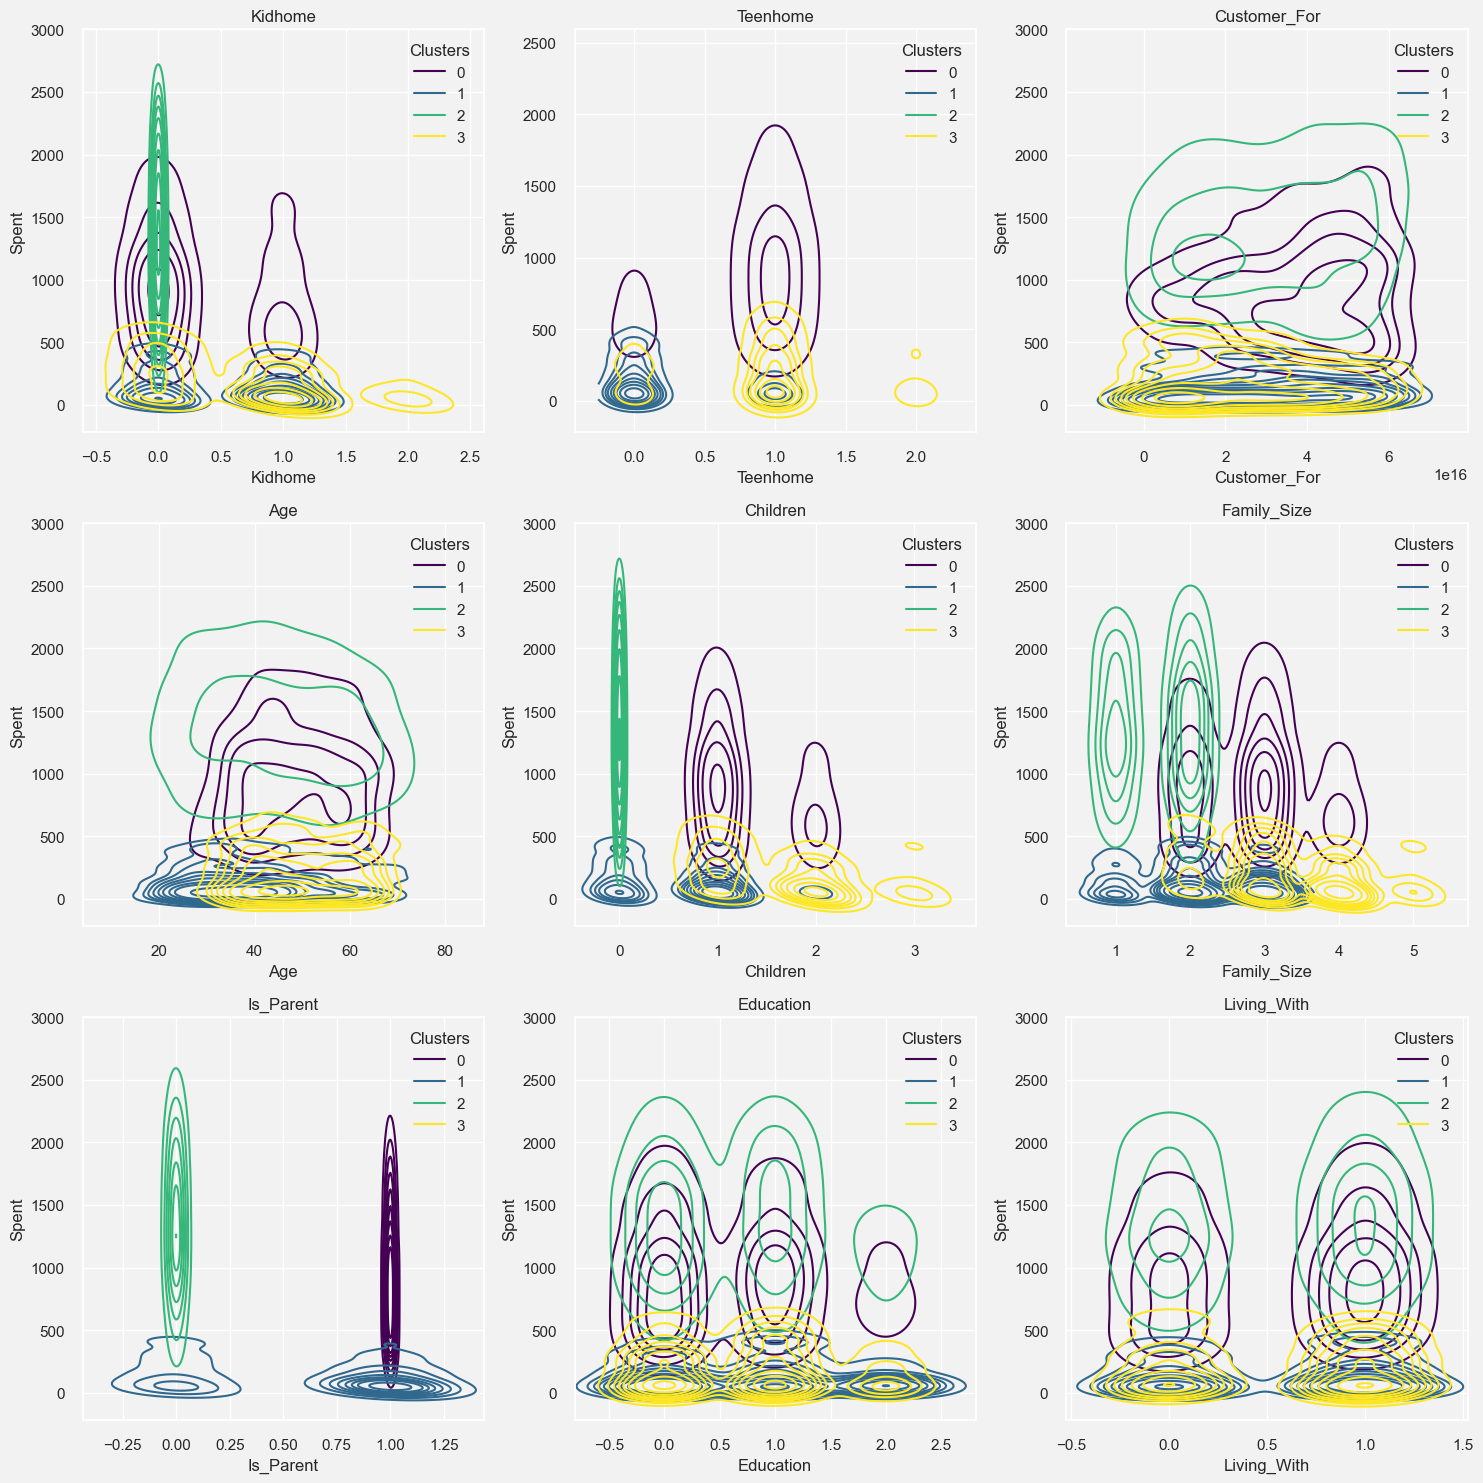

In [47]:
# Set up the 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the personal columns and create subplots
for i, col in enumerate(Personal):
    sns.kdeplot(x=mc_df[col], y=mc_df["Spent"], hue=mc_df["Clusters"], palette='viridis', ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

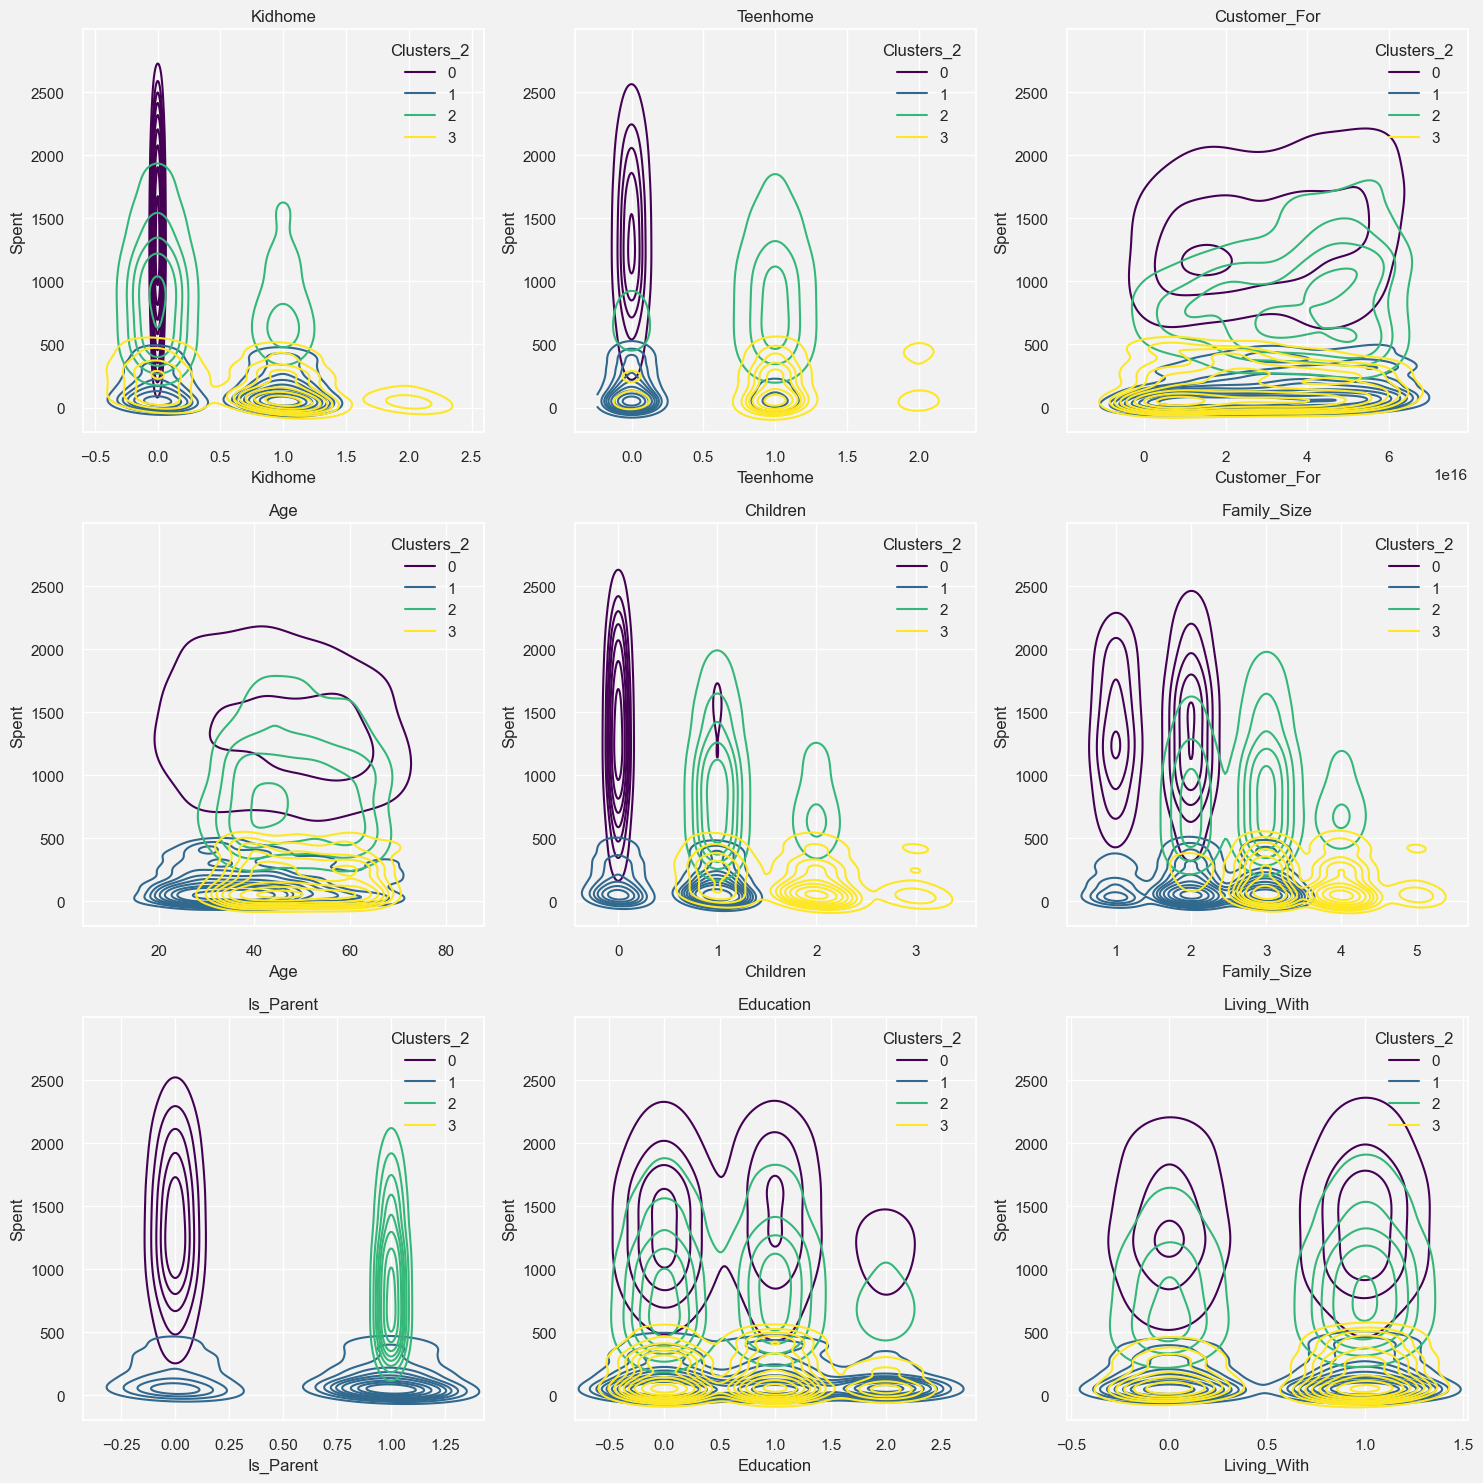

In [48]:
# Set up the 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the personal columns and create subplots
for i, col in enumerate(Personal):
    sns.kdeplot(x=mc_df[col], y=mc_df["Spent"], hue=mc_df["Clusters_2"], palette='viridis', ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()